# BERT Base -  Augmented Data - Filtered Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
datasetPath = "/content/drive/MyDrive/Thesis/Code/GenerativeDataAugmentation/Coba14/filteredData/augJoin2.csv"
dataset = pd.read_csv(datasetPath, index_col=0, encoding="utf-8")
dataset.rename(columns={'text' : 'Text', 'emotion' : 'Emotion'}, inplace=True)

In [ ]:
dataset

,Text,Emotion
0,I do remember this and wanted nothing more tha...,anger
1,i feel the isolation and despair of the rejected,sadness
2,[NAME] damn cummonists,anger
3,Oh wait that's him.,surprise
4,I think it could be worse. A lot of people are...,fear
...,...,...
78852,i can take the pain and struggle out feeling ...,fear
78853,Our 2nd unit is as bad as anybody in the NBA,sadness
78854,Some additional background the robo-voice on t...,fear
78855,i feel really amazed and amazed and more than ...,surprise


In [ ]:
dataset['Emotion'].value_counts()

joy         14744
sadness     14168
fear        13884
anger       12987
surprise    12330
disgust     10744
Name: Emotion, dtype: int64

In [ ]:
encoded_dict = {'anger':0, 'fear':1, 'joy':2, 'disgust':3, 'sadness':4, 'surprise':5}
dataset['Emotion'] = dataset.Emotion.map(encoded_dict)

In [ ]:
dataset

,Text,Emotion
0,I do remember this and wanted nothing more tha...,0
1,i feel the isolation and despair of the rejected,4
2,[NAME] damn cummonists,0
3,Oh wait that's him.,5
4,I think it could be worse. A lot of people are...,1
...,...,...
78852,i can take the pain and struggle out feeling ...,1
78853,Our 2nd unit is as bad as anybody in the NBA,4
78854,Some additional background the robo-voice on t...,1
78855,i feel really amazed and amazed and more than ...,5


In [ ]:
import numpy as np
training_data, validation_data, test_data = np.split(dataset.sample(frac=1), [int(.8*len(dataset)), int(.9*len(dataset))])

In [ ]:
training_data = training_data.reset_index().drop(['index'], axis=1)

In [ ]:
training_data

,Text,Emotion
0,Wow this is horrible. is a horrible thing to say.,1
1,i tell the people closest to me things that i ...,5
2,"Ohhh lol, gross and funny",2
3,i feel disgusted and humiliated by my own self,0
4,Yep. Happy New Years!,2
...,...,...
63080,It would also be extremely dangerous to fly,1
63081,Can’t believe a club paid $550k for Sandow tha...,5
63082,He must smell terrible when he sweats. That's ...,0
63083,You're mistaking a poor character for MC.,0


In [ ]:
training_data['Emotion'].value_counts()

2    11742
4    11299
1    11114
0    10424
5     9881
3     8625
Name: Emotion, dtype: int64

In [ ]:
validation_data = validation_data.reset_index().drop(['index'], axis=1)

In [ ]:
validation_data

,Text,Emotion
0,i hate the feeling that i am a pathetic loser ...,4
1,Why go to the moon when you can *BECOME THE MOON*,2
2,i feel more self assured and confident in my a...,2
3,i still can t believe you took this relations...,5
4,i realized that clothing is made in all sizes ...,2
...,...,...
7881,i had planted about trees and was feeling very...,2
7882,ok so that was fucking sick,4
7883,i feel a litte shaken up by this point,1
7884,i have been feeling a bit dissatisfied over th...,0


In [ ]:
validation_data['Emotion'].value_counts()

2    1522
4    1387
1    1368
0    1293
5    1246
3    1070
Name: Emotion, dtype: int64

In [ ]:
test_data = test_data.reset_index().drop(['index'], axis=1)

In [ ]:
test_data

,Text,Emotion
0,Stay on your feet Lovejoy,2
1,You’d think the higher ups would look at how m...,0
2,I see notifications of people commenting the s...,4
3,Not at all. I really can't imagine being this ...,5
4,Nothing. Fuck the environment so people can th...,0
...,...,...
7881,Shut up you shill /s,0
7882,If she canf even protect herself what the fuck...,0
7883,I'm actually surprised it stayed up. We alread...,5
7884,This is the most racist thing I've ever seen o...,3


In [ ]:
test_data['Emotion'].value_counts()

4    1482
2    1480
1    1402
0    1270
5    1203
3    1049
Name: Emotion, dtype: int64

# Model 

In [ ]:
training_data.shape, test_data.shape, validation_data.shape

((63085, 2), (7886, 2), (7886, 2))

In [ ]:
!pip install transformers==4.18.0
import transformers
print(transformers.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.0 MB 14.4 MB/s 
     |████████████████████████████████| 182 kB 90.0 MB/s 
     |████████████████████████████████| 880 kB 69.8 MB/s 
     |████████████████████████████████| 6.6 MB 49.9 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=e9e50f452a80fc86d528a585574e9f3daab37df92f9bb69e7a56322dcb0439db
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
4.18.0


In [ ]:
# Tentukan pre-trained model yang akan digunakan untuk fine-tuning
# Daftar model dapat ditemukan pada https://huggingface.co

PRE_TRAINED_MODEL = 'bert-base-cased'

In [ ]:
from transformers import BertTokenizer

bert_tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL)  # Load tokenizer dari pre-trained model

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Contoh Tokenisasi

id_data = 5 # Mengambil data indeks ke-5 pada dataframe

print('Kalimat:', test_data.Text[id_data])
print('BERT Tokenizer:', bert_tokenizer.tokenize(test_data.Text[id_data]))

Kalimat: I'm surprised you called your ex that. Seems weird, especially since they are on a date together.
BERT Tokenizer: ['I', "'", 'm', 'surprised', 'you', 'called', 'your', 'ex', 'that', '.', 'Seems', 'weird', ',', 'especially', 'since', 'they', 'are', 'on', 'a', 'date', 'together', '.']


In [ ]:
# Contoh input formatting untuk BERT. Input formating dapat menggunakan fungsi `encode_plus`

bert_input = bert_tokenizer.encode_plus(
    training_data.Text[id_data],    # Sample kalimat                
    add_special_tokens = True,      # Tambahkan token [CLS] pada awal kalimat dan token [SEP] pada akhir kalimat
    padding = 'max_length',         # Tambahkan padding ke max_length menggunakan token [PAD] jika kalimat kurang dari max_length
    truncation = 'longest_first',   # Truncate jika kalimat lebih dari max_length
    max_length = 100,               # Tentukan max_length dari seluruh kalimat
    return_attention_mask = True,   # Mengembalikan nilai attention mask
    return_token_type_ids =True     # Mengembalikan nilai token type id (segment embedding)
    )

# Fungsi `encode_plus` mengembalikan 3 nilai: input_ids, token_type_ids, attention_mask
bert_input.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
print('Kalimat\t\t:', training_data.Text[id_data])                                      # Data asli
print('Tokenizer\t:', bert_tokenizer.convert_ids_to_tokens(bert_input['input_ids']))    # Hasil input formatting + tokenizer
print('Input IDs\t:', bert_input['input_ids'])                                          # Input IDs : indeks token pada vocabulary tokenizer
print('Token Type IDs\t:', bert_input['token_type_ids'])                                # Token type IDs : menunjukkan urutan kalimat pada sequence (segment embedding)
print('Attention Mask\t:', bert_input['attention_mask'])                                # Attention mask : mengembalikan nilai [0,1]. 1 artinya token yang di masking, 0 token yang tidak di masking (diabaikan)

Kalimat		: Glad your boss backed you up
Tokenizer	: ['[CLS]', 'Glad', 'your', 'boss', 'backed', 'you', 'up', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Input IDs	: [101, 27652, 1240, 6054, 5534, 1128, 1146,

In [ ]:
import random
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

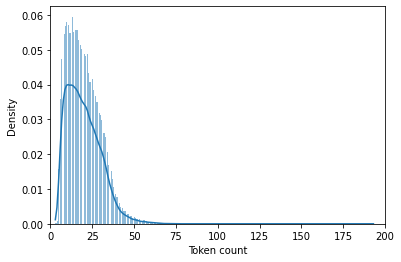

In [ ]:
'''
Ada banyak cara untuk menentukan max_length
Intuisinya adalah kita tidak ingin memotong kalimat, atau terlalu banyak menambahkan padding (komputasi lebih lama)
Contoh ini, max_lenght ditentukan dari distribusi token pada dataset 
'''
token_lens = []

for txt in training_data.Text:
  tokens = bert_tokenizer.encode(txt)
  token_lens.append(len(tokens))

sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 200]);
plt.xlabel('Token count');

In [ ]:
# Dapat dilihat dari grafik diatas, sebagian besar kalimat tampaknya berisi kurang dari 80 token
# Maka, tentukan max_length adalah 80

MAX_LEN = 100

In [ ]:
# Buat fungsi untuk menggabungkan langkah tokenisasi, menambahkan special tokens untuk keseluruhan data sebagai input formatting ke model BERT
def convert_example_to_feature(sentence):  
  return bert_tokenizer.encode_plus(
      sentence, 
      add_special_tokens = True, 
      padding = 'max_length',
      truncation = 'longest_first',
      max_length = MAX_LEN, 
      return_attention_mask = True, 
      return_token_type_ids=True
    )

In [ ]:
# Buat fungsi untuk memetakan input hasil input formatting agar sesuai dengan model BERT
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,               # Sebagai token embedding
      "token_type_ids": token_type_ids,     # Sebagai segment embedding
      "attention_mask": attention_masks,    # Sebagai filter informasi mana yang kalkulasi oleh model
  }, label

In [ ]:
!pip install tensorflow==2.8.0
import tensorflow as tf
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 15 kB/s 
     |████████████████████████████████| 5.8 MB 15.7 MB/s 
     |████████████████████████████████| 462 kB 77.1 MB/s 
     |████████████████████████████████| 1.4 MB 66.2 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2
2.8.0


In [ ]:
# Buat fungsi untuk iterasi pada setiap kalimat pada keseluruhan data
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
    
  for sentence, label in data.to_numpy():

    bert_input = convert_example_to_feature(sentence)
  
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])

  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

# Fine Tuning

In [ ]:
# Tentukan nilai hyperparamter untuk fine-tuning
EPOCHS = 5
BATCH_SIZE = 16
LEARNING_RATE = 5e-5

In [ ]:
# Lakukan input formatting menggunakan fungsi sebelumnya pada data keseluruhan data
train_encoded = encode(training_data).batch(BATCH_SIZE)
test_encoded = encode(test_data).batch(BATCH_SIZE)
val_encoded = encode(validation_data).batch(BATCH_SIZE)

In [ ]:
'''
BERT untuk tugas klasifikasi sequence (teks) dengan menambahkan linear layer di atas pooled output untuk pengklasifikasi
https://huggingface.co/docs/transformers/model_doc/bert#transformers.TFBertForSequenceClassification
'''

from transformers import TFBertForSequenceClassification

# Load model
bert_model = TFBertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL, num_labels=6)

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tentukan optimizer dengan learning rate tertentu
# Paper aslinya menggunakan Adam Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

# Karena tidak menggunakan one-hot vectors, sehingga loss function dapat menggunakan sparse categorical cross entropy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

# Compile model
bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
%%time
bert_history = bert_model.fit(train_encoded, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=val_encoded)

Epoch 1/5
3943/3943 [==============================] - 1370s 343ms/step - loss: 0.6724 - accuracy: 0.7715 - val_loss: 0.6075 - val_accuracy: 0.7984
Epoch 2/5
3943/3943 [==============================] - 1346s 341ms/step - loss: 0.4935 - accuracy: 0.8319 - val_loss: 0.5889 - val_accuracy: 0.8051
Epoch 3/5
3943/3943 [==============================] - 1345s 341ms/step - loss: 0.4034 - accuracy: 0.8619 - val_loss: 0.6230 - val_accuracy: 0.8028
Epoch 4/5
3943/3943 [==============================] - 1346s 341ms/step - loss: 0.3512 - accuracy: 0.8799 - val_loss: 0.6719 - val_accuracy: 0.7956
Epoch 5/5
3943/3943 [==============================] - 1345s 341ms/step - loss: 0.3134 - accuracy: 0.8905 - val_loss: 0.7238 - val_accuracy: 0.7960
CPU times: user 1h 21min 49s, sys: 13min 44s, total: 1h 35min 33s
Wall time: 1h 53min 28s


# Evaluation

In [ ]:
# Buat fungsi untuk plotting hasil training
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

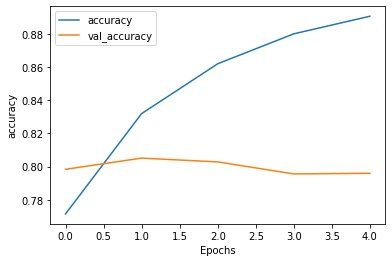

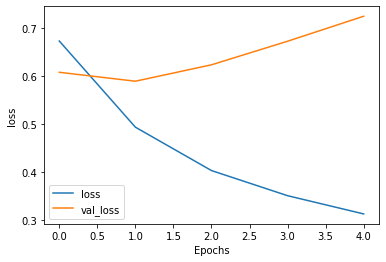

In [ ]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [ ]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCHS):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, bert_history.history['accuracy'][i], bert_history.history['loss'][i], bert_history.history['val_accuracy'][i], bert_history.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.771515 	   0.672368 	   0.798377 	   0.607462
       2   0.831894 	   0.493496 	   0.805098 	   0.588911
       3   0.861901 	   0.403391 	   0.802815 	   0.622974
       4   0.879908 	   0.351235 	   0.795587 	   0.671915
       5   0.890497 	   0.313390 	   0.795968 	   0.723808


In [ ]:
score = bert_model.evaluate(test_encoded)

print("Test Accuracy:", score[1])

493/493 [==============================] - 57s 115ms/step - loss: 0.7050 - accuracy: 0.7965
Test Accuracy: 0.7964747548103333


In [ ]:
predicted_raw = bert_model.predict(test_encoded)

In [ ]:
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(test_data['Emotion'])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy_score(y_true, y_pred)

0.7964747654070504

In [ ]:
confusion_matrix(y_true, y_pred)

array([[ 961,   29,   37,  149,   42,   52],
       [  63, 1166,   15,   65,   54,   39],
       [  29,    8, 1318,   21,   29,   75],
       [ 161,   54,   22,  715,   48,   49],
       [ 119,   42,   57,   63, 1159,   42],
       [  52,   40,   77,   50,   22,  962]])

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72      1270
           1       0.87      0.83      0.85      1402
           2       0.86      0.89      0.88      1480
           3       0.67      0.68      0.68      1049
           4       0.86      0.78      0.82      1482
           5       0.79      0.80      0.79      1203

    accuracy                           0.80      7886
   macro avg       0.79      0.79      0.79      7886
weighted avg       0.80      0.80      0.80      7886

